In [1]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import category_encoders as ce

In [2]:
df = pd.read_csv(r'BW.csv')

In [3]:
df.shape

(13188, 30)

In [4]:
df.columns

Index(['AGE', 'REG', 'RES', 'C_RES', 'EDU', 'LIT', 'P_NEWS', 'W_TV', 'L_RAD',
       'S_WAT', 'S_N_WAT', 'T_TYP', 'L_GHT', 'H_RAD', 'H_TV', 'H_FRG', 'H_BIC',
       'H_MBIC', 'H_CAR', 'REL', 'ETHN', 'M_ST', 'P_EDU', 'P_OCC', 'P_JBT',
       'JBT', 'OCC', 'Unnamed: 27', 'PAR', 'B_SIZE'],
      dtype='object')

In [5]:
df.isna().sum()

AGE                0
REG                0
RES                0
C_RES              0
EDU                0
LIT                0
P_NEWS             0
W_TV               0
L_RAD              0
S_WAT              0
S_N_WAT            0
T_TYP              0
L_GHT              0
H_RAD              0
H_TV               0
H_FRG              0
H_BIC              0
H_MBIC             0
H_CAR              0
REL                0
ETHN               0
M_ST               0
P_EDU              0
P_OCC              0
P_JBT              7
JBT               11
OCC               16
Unnamed: 27    13188
PAR             1316
B_SIZE            27
dtype: int64

In [6]:
df= df.loc[df.B_SIZE.notna(),['B_SIZE','PAR','AGE','RES','C_RES','EDU','M_ST']]
df= df.loc[df.PAR.notna(),['B_SIZE','PAR','AGE','RES','C_RES','EDU','M_ST']]

In [7]:
df.shape

(11872, 7)

In [8]:
df.isna().sum()

B_SIZE    0
PAR       0
AGE       0
RES       0
C_RES     0
EDU       0
M_ST      0
dtype: int64

In [9]:
df.head()

,B_SIZE,PAR,AGE,RES,C_RES,EDU,M_ST
0,,Single,45-49,Rural,Town,Secondary,Never married
1,,Single,45-49,Rural,Town,Secondary,Never married
2,,Single,45-49,Rural,Town,Secondary,Never married
3,,Single,45-49,Rural,Town,Secondary,Never married
4,,Single,45-49,Rural,Town,Secondary,Never married


In [10]:
x = df.loc[:, ['PAR','AGE','RES','C_RES','EDU','M_ST']] 
y = df.B_SIZE 

In [11]:
x.shape

(11872, 6)

In [12]:
x.head()

,PAR,AGE,RES,C_RES,EDU,M_ST
0,Single,45-49,Rural,Town,Secondary,Never married
1,Single,45-49,Rural,Town,Secondary,Never married
2,Single,45-49,Rural,Town,Secondary,Never married
3,Single,45-49,Rural,Town,Secondary,Never married
4,Single,45-49,Rural,Town,Secondary,Never married


In [13]:
y.shape

(11872,)

In [14]:
y.head()

0     
1     
2     
3     
4     
Name: B_SIZE, dtype: object

In [15]:
import category_encoders as ce
#import pandas as pd

In [16]:
encoder = ce.OrdinalEncoder(cols=['EDU','AGE','M_ST','RES','C_RES','PAR','D_COMP'],return_df=True,
                           mapping=[
{'col':'EDU',
'mapping':{'None':0,'No education':1,'Primary':2,'Secondary':3,'Higher':4}},
{'col':'AGE',
'mapping':{'None':0,'15-19':1,'20-24':2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7}},
{'col':'M_ST',
'mapping':{'None':0,'Never married':1,'Married':2,'Living together':3,'Widowed':4,'Divorced':5,'Not living together':6}},
{'col':'RES',
'mapping':{'None':0,'Urban':1,'Rural':2}},
{'col':'C_RES',
'mapping':{'None':0,'Large city':1,'City':2,'Town':3,'Countryside':4,'Abroad':5}},
{'col':'PAR',
'mapping':{'None':0,'Single':1,'Multiple':2}}                               
])


In [17]:
x_trans = encoder.fit_transform(x) 
x_trans

,PAR,AGE,RES,C_RES,EDU,M_ST
0,1,7,2,3,3,1
1,1,7,2,3,3,1
2,1,7,2,3,3,1
3,1,7,2,3,3,1
4,1,7,2,3,3,1
...,...,...,...,...,...,...
13183,1,4,1,3,2,2
13184,1,4,1,3,2,2
13185,1,4,1,3,2,2
13186,1,2,1,2,1,2


In [18]:
encoder = ce.OrdinalEncoder(cols=['B_SIZE'],return_df=True,
                           mapping=[
{'col':'B_SIZE',
'mapping':{'None':0,'Very Small':1,'Smaller than average':2,'Average':3,'Larger than average':4, 'Very Large':5}}
])

In [19]:
y_trans = encoder.fit_transform(y) 
y_trans

,B_SIZE
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
...,...
13183,-1.0
13184,-1.0
13185,-1.0
13186,3.0


In [20]:
y_trans.shape

(11872, 1)

In [21]:
from sklearn.decomposition import PCA
# spliting input and target
X = x_trans
Y = y_trans

In [22]:
pca = PCA(n_components=2).fit_transform(X) # pca output is an array
pca_df = pd.DataFrame(pca,columns=['pca_1','pca_2']) # transforming back to df
pca_Y = pd.concat([pca_df, Y],axis=1)

C:\Users\Henry\Python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


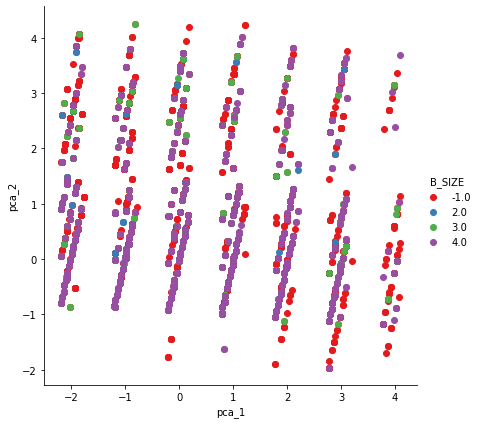

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(pca_Y, hue="B_SIZE", palette="Set1", size=6).map(plt.scatter, "pca_1", "pca_2").add_legend()
plt.show()

In [24]:
X_train, X_validation, Y_train, Y_validation = train_test_split(x_trans, y_trans, test_size=0.20, random_state=1, shuffle=True)

In [25]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [26]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

LR: 0.785933 (0.005720)


C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

LDA: 0.786670 (0.006077)


C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\mode

KNN: 0.762557 (0.009724)
CART: 0.779089 (0.006201)


C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

NB: 0.784670 (0.006573)


C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

SVM: 0.784565 (0.005875)


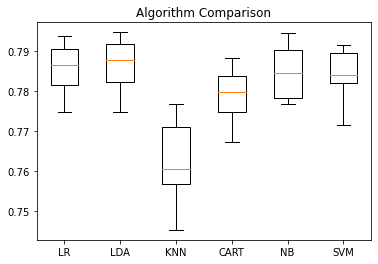

In [27]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [28]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
# Evaluate predictions
acs = accuracy_score(Y_validation, predictions)
cm = confusion_matrix(Y_validation, predictions)
cr = classification_report(Y_validation, predictions)
print(acs)
print(cm)
print(cr)

0.776
[[1781    0    0   48]
 [  81    0    0   15]
 [ 124    0    0   47]
 [ 217    0    0   62]]
              precision    recall  f1-score   support

        -1.0       0.81      0.97      0.88      1829
         2.0       0.00      0.00      0.00        96
         3.0       0.00      0.00      0.00       171
         4.0       0.36      0.22      0.27       279

    accuracy                           0.78      2375
   macro avg       0.29      0.30      0.29      2375
weighted avg       0.66      0.78      0.71      2375



C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
import pandas as pd
import seaborn as sns
cm_df = pd.DataFrame(cm)
cm_df

,0,1,2,3
0,1781,0,0,48
1,81,0,0,15
2,124,0,0,47
3,217,0,0,62


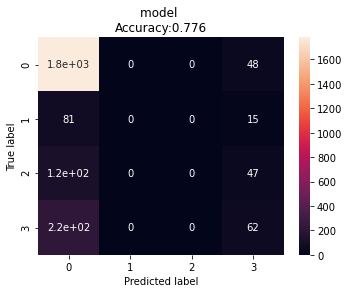

In [31]:
import pandas as pd
import seaborn as sns
pyplot.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
pyplot.title('model \nAccuracy:{0:.3f}'.format(acs))
pyplot.ylabel('True label')
pyplot.xlabel('Predicted label')
pyplot.show()

slickHNAA